# Inheritance

- Inheritance is a way to form new classes based on existing classes.

- The class from which other classes are formed or derived from, is called a **Base class**.

- The sub classes are called **Derived class**.

- The Derived classes inherit the functionality of the base class and they can extend/override the functionality inherited.

- The base class can be specified in the derived class' definition inside the `()`.
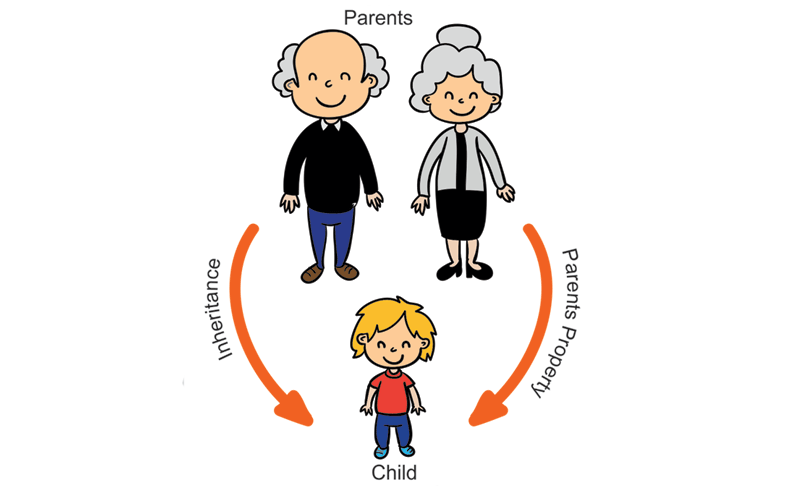

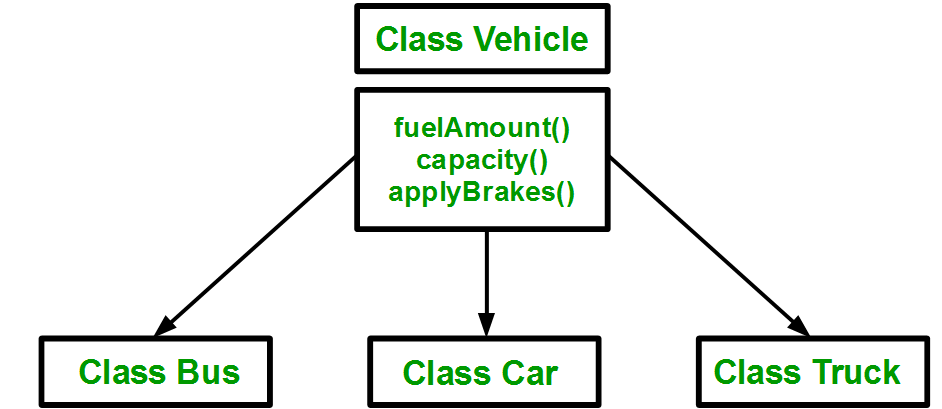

## Types of inheritance

- Just have an idea of the following:

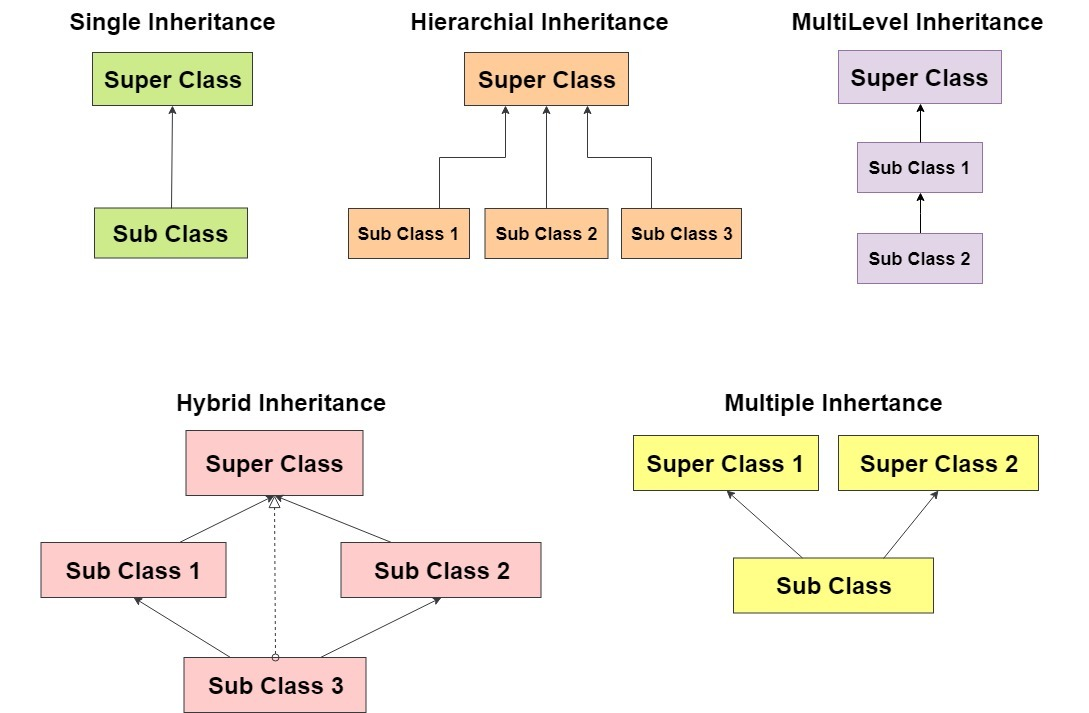

In [3]:
# Simple example for inheritance

# Base class
class Animal():
    
    def __init__(self):
        print('Animal __init__')
    
    def info(self):
        print('Animal')
    
    def eat(self):
        print('Animal Eating')
        

# Derived class
class Dog(Animal):
    
    def __init__(self):
        # call the constructor of the base class
        Animal.__init__(self)
        # super().__init__(self)
        print('Dog __init__')
    
    # Overwriting methods
    def info(self):
        print('Dog')
        
    def eat(self):
        print('Dog eating')
        
    # Adding new methods
    def bark(self):
        print('Woof!')
    
my_dog = Dog()
my_dog.info()
my_dog.eat()
my_dog.bark()

Animal __init__
Dog __init__
Dog
Dog eating
Woof!


Let's look at a more complete example.

In [7]:
# Base class
class Employee():
    
    raise_amount = 1.05
    
    def __init__(self, firstname, lastname, pay):
        self.firstname = firstname
        self.lastname = lastname
        self.pay = pay
        self.email = f'{firstname}.{lastname}@company.com'
        
    def get_fullname(self):
        return f'{self.firstname} {self.lastname}'
    
    def apply_raise(self):
        self.pay = self.pay * self.raise_amount

In [8]:
# Derived class
class Developer(Employee):
    pass

help(Developer)

Help on class Developer in module __main__:

class Developer(Employee)
 |  Developer(firstname, lastname, pay)
 |  
 |  Method resolution order:
 |      Developer
 |      Employee
 |      builtins.object
 |  
 |  Methods inherited from Employee:
 |  
 |  __init__(self, firstname, lastname, pay)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  apply_raise(self)
 |  
 |  get_fullname(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Employee:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes inherited from Employee:
 |  
 |  raise_amount = 1.05



- When you call `help(NameOfClass)`, it outputs the following information:
    
    - Method Resolution Order
    
    - Methods inherited from Parent Classes
    
    - Attributes inherited from Parent Classes
    
- On an object, when methods are being called, Python searches the Method Resolution Order and picks the top most class having the specified method.

- On an object, when attributes are being references, the current objects attributes are checked, followed by the inherited ones.

- While object creation, Python searches for `__init__()` for the current class, else tries to fall back onto `__init__()` of the parent classes as per Method Resolution Order.


In [10]:
dev1 = Developer('John', 'Doe', 1000)
print(dev1.firstname)
print(dev1.lastname)
print(dev1.email)
print(dev1.pay)
dev1.apply_raise()
print(dev1.pay)

John
Doe
John.Doe@company.com
1000
1050.0


In [15]:
# Now lets add more functionality to the derived class

class Developer(Employee):
    # changing the class-object attribute
    raise_amount = 1.10
    
    # constructor
    def __init__(self, firstname, lastname, pay, fav_prog_lang):
        super().__init__(firstname, lastname, pay)
        self.fav_prog_lang = fav_prog_lang
        
dev1 = Developer('Tucker', 'Budzyn', 10000, 'Java')
emp1 = Employee('Todd', 'Budzyn', 10000)

print(dev1.firstname, dev1.lastname, dev1.email, dev1.pay, dev1.fav_prog_lang)
print(emp1.firstname, emp1.lastname, emp1.email, emp1.pay)

print(dev1.pay, emp1.pay)
dev1.apply_raise()
emp1.apply_raise()
print(dev1.pay, emp1.pay)

Tucker Budzyn Tucker.Budzyn@company.com 10000 Java
Todd Budzyn Todd.Budzyn@company.com 10000
10000 10000
11000.0 10500.0


In [21]:
# Creating another derived class

class Manager(Employee):
    
    raise_amount = 1.20
    
    def __init__(self, firstname, lastname, pay, subords):
        super().__init__(firstname, lastname, pay)
        self.subords = subords
        
    def add_subord(self, subord):
        if subord not in self.subords:
            self.subords.append(subord)
        
    def remove_subord(self, subord):
        if subord in self.subords:
            self.subords.remove(subord)

    def show_subords(self):
        for subord in self.subords:
            print(subord.get_fullname())
            

In [24]:
mgr1 = Manager('Courtney', 'Budzyn', 20000, [dev1, emp1])

dev2 = Developer('Steve', '', 7000, 'Python')

mgr1.show_subords()

print('----------')

mgr1.add_subord(dev2)

mgr1.show_subords()

print('----------')

mgr1.remove_subord(dev2)

mgr1.show_subords()


Tucker Budzyn
Todd Budzyn
----------
Tucker Budzyn
Todd Budzyn
Steve 
----------
Tucker Budzyn
Todd Budzyn


## `isinstance()` and `issubclass()` methods

- `isinstance(obj_var, className)` returns `True` if `obj_var` is a direct instance or an indirect instance (has ancestor) of the class `className`.

- `issubclass(class_1, class_2)` returns `True` if class `class_1` is a derived class (descendent) of class `class_2`.


In [25]:
isinstance(emp1, Employee) # direct instance

True

In [26]:
isinstance(emp1, Developer) 

False

In [27]:
isinstance(dev1, Employee) # indirect instance (derived instance)

True

In [28]:
isinstance(dev1, Developer)

True

In [29]:
isinstance(dev1, Manager)

False

In [30]:
issubclass(Employee, Developer)

False

In [31]:
issubclass(Developer, Employee)

True

In [32]:
issubclass(Developer, Manager)

False

In [33]:
issubclass(Manager, Developer)

False